1. Wczytaj dane z pliku iris.csv i zapoznaj się z nimi. Wygeneruj statystyki.

In [29]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:0.2f}'.format)
iris_data = pd.read_csv('iris.csv')

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


2. Utwórz wykres macierzowy dla wszystkich cech. Rozróżnij klasy za pomocą kolorów.

In [31]:
iris_data.groupby('Name').size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

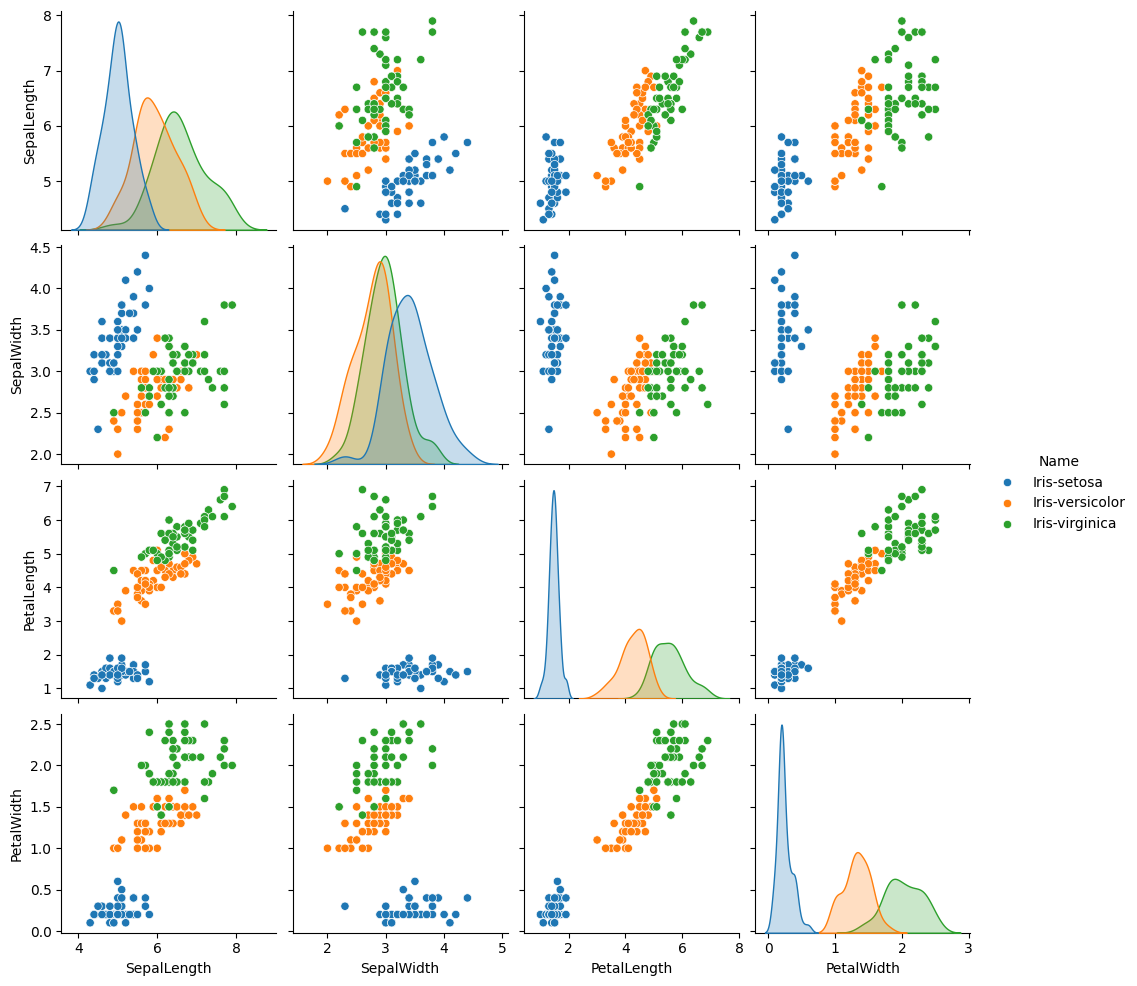

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_data, hue='Name')


3. Utwórz macierz korelacji.


<Axes: >

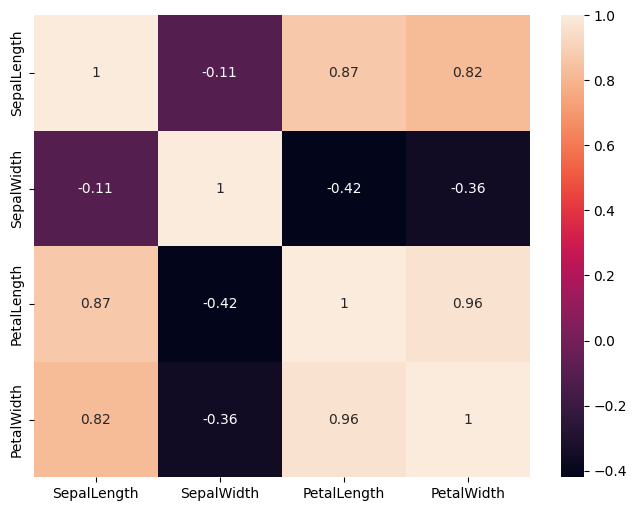

In [33]:
correlation_matrix = iris_data.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)

4. Podziel dane na zbiór treningowy oraz testowy w proporcjach 80:20.


In [34]:
from sklearn.model_selection import train_test_split
X = iris_data.iloc[:, :-1]
y = iris_data.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

y_test.groupby('Name').size()

Name
Iris-setosa        12
Iris-versicolor     8
Iris-virginica     10
dtype: int64

5. Przeprowadź klasyfikację irysa, którego każdy płatek ma długość i szerokość równą 2 za pomocą algorytmu k-najbliższych sąsiadów z uwzględnieniem tylko najbliższego sąsiada.


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_1n = KNeighborsClassifier(n_neighbors=3)
knn_1n.fit(X_train, y_train)

new_irys = [[2, 2, 2, 2]]
print(knn_1n.predict(new_irys))

['Iris-setosa']


C:\Users\rtome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rtome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


6. Przeprowadź klasyfikację na zbiorze testowym. Oblicz dokładność, czułość i precyzję.

In [36]:
from sklearn.metrics import classification_report

prediction = knn_1n.predict(X_test)

print(classification_report(y_true = y_test, y_pred = prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



7. Utwórz macierz pomyłek.

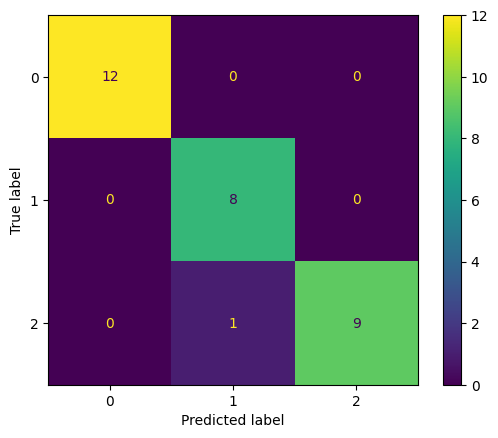

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, prediction))
cm.plot()

8. Przeprowadź walidację krzyżową z uwzględnieniem trzech i pięciu podzbiorów. Oblicz dokładność.

In [38]:
from sklearn.model_selection import cross_val_score, KFold

# kFold = KFold(n_splits = 3)
# scpre = cross_val_score(knn_1n, X, y.values.ravel(), cv=kFold)

kFold = KFold(n_splits = 5) # 5 fold - podzial 80:20
score = cross_val_score(knn_1n, X, y.values.ravel(), cv=kFold)

print("Dokladnosc wyniosla:")
print(score)
print("\nŚrednia dokladnosc wyniosla:")
print(score.mean())


Dokladnosc wyniosla:
[1.         1.         0.83333333 0.93333333 0.76666667]

Średnia dokladnosc wyniosla:
0.9066666666666666


9. Przeprowadź stratyfikowaną walidację krzyżową z uwzględnieniem pięciu podzbiorów. Oblicz dokładność.

In [39]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
score = cross_val_score(knn_1n, X, y.values.ravel(), cv=skf)

print("Dokladnosc wyniosla:")
print(score)
print("\nŚrednia dokladnosc wyniosla:")
print(score.mean())

Dokladnosc wyniosla:
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

Średnia dokladnosc wyniosla:
0.9666666666666668


10. Przeprowadź klasyfikację z uwzględnieniem większej liczby sąsiadów i dwóch różnych miar odległości. Oblicz dokładność.

11. Przeprowadź klasyfikację za pomocą drzewa decyzyjnego, lasu losowego, maszyny wektorów nośnych oraz naiwnego klasyfikatora Bayesa. Oblicz dokładność.

Drzewo decyzyjne

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
prediction_tree = tree_classifier.predict(X_test)

print(classification_report(y_true = y_test, y_pred = prediction_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Las Losowy

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)
prediction_forest = tree_classifier.predict(X_test)

print(classification_report(y_true = y_test, y_pred = prediction_forest))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\rtome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Maszyna wektorów nośnych

In [42]:
from sklearn.svm import SVC



Naiwny klasyfikator Bayesa

In [43]:
from sklearn.naive_bayes import GaussianNB


12. Przeprowadź klasyfikację za pomocą algorytmów CatBoost, LightGBM oraz XGBoost. Oblicz dokładność.

CatBoost

LightGBM

XGBoost